<a href="https://colab.research.google.com/github/bashar-z/PCM-Health-Classification/blob/main/pcm_health_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries imported successfully.

✅ Step 2: Data simulation complete.

Class balance:
 Label
Degraded        0.60
Healthy         0.21
Near-Failure    0.19
Name: proportion, dtype: float64 

Dataset saved to 'pcm_health_final_dataset.csv'

✅ Step 3: Starting Exploratory Data Analysis...


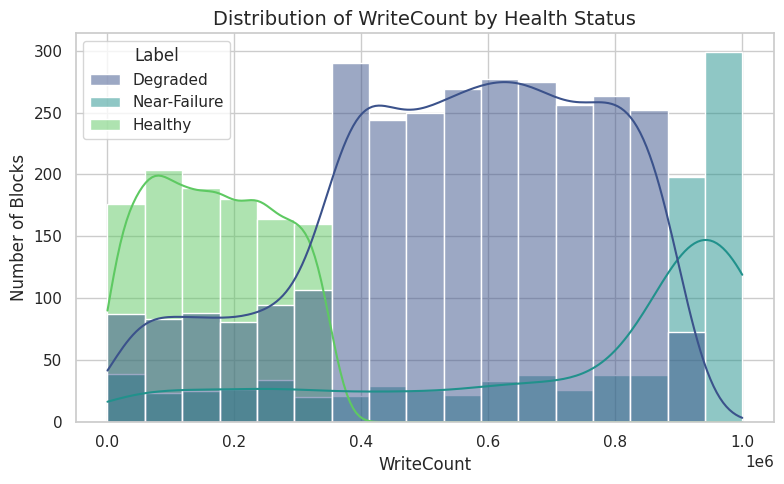

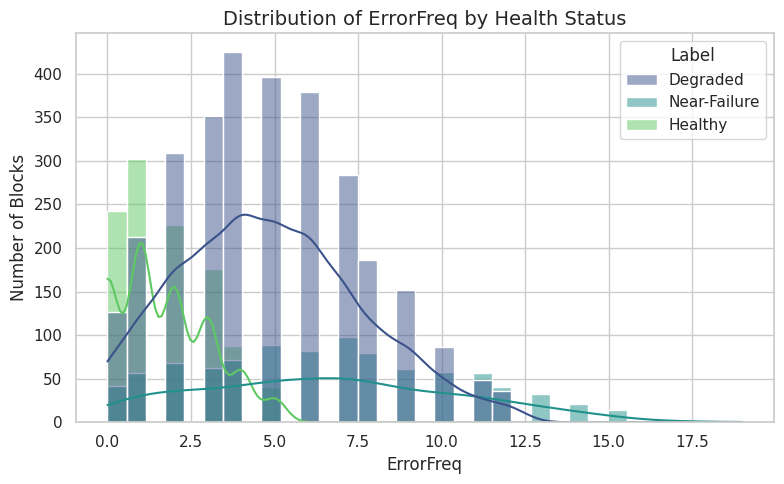

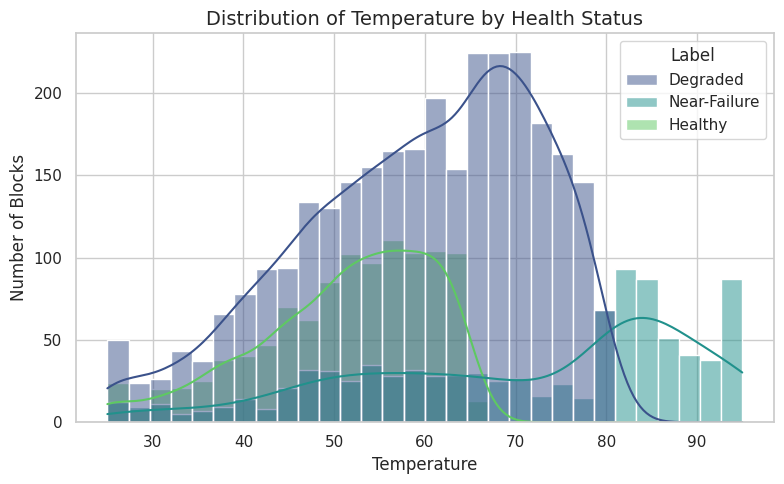

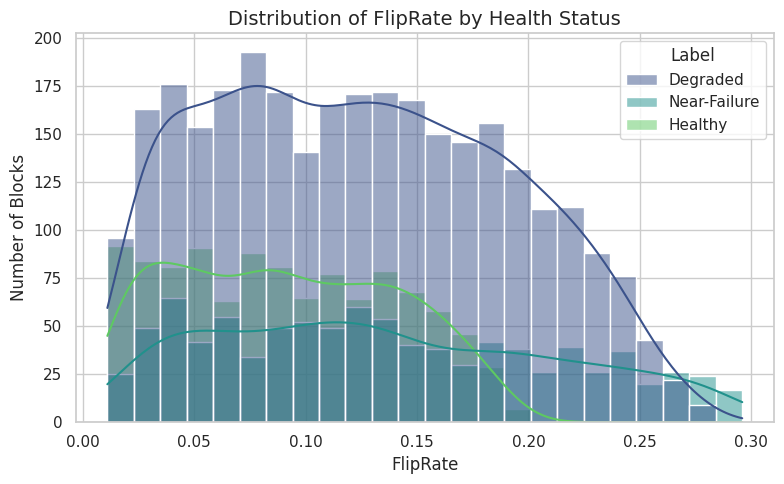

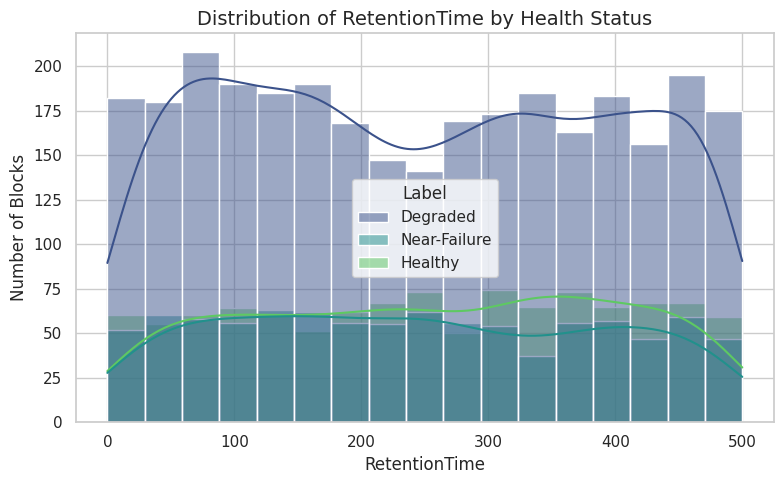

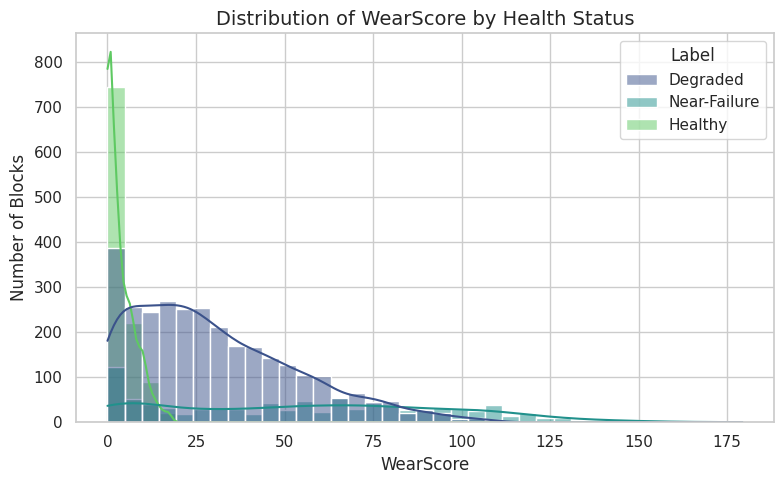

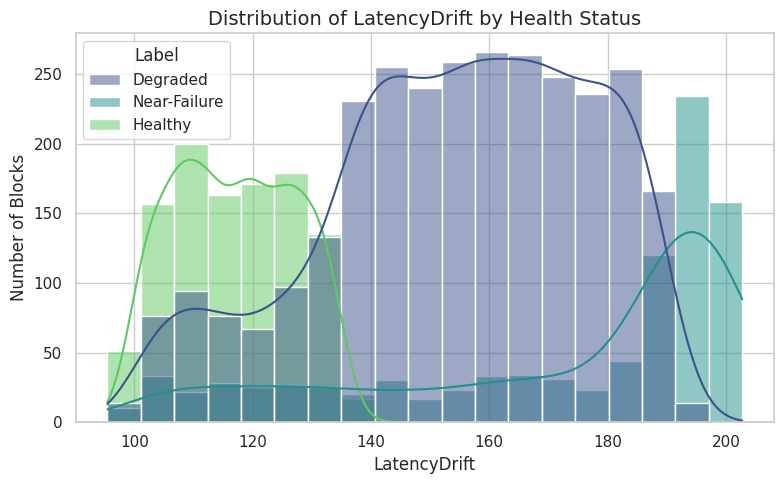

Feature scaling complete.

✅ Step 4: Training and evaluating models...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi


✅ Step 5: Displaying final results and visualizations...

------------------------------
RESULTS FOR: Decision Tree
------------------------------
5-fold Cross-Validation Accuracy: 0.9989

Classification Report:
              precision  recall  f1-score    support
Degraded         0.9987  0.9960    0.9973   748.0000
Healthy          0.9926  1.0000    0.9963   268.0000
Near-Failure     0.9957  0.9957    0.9957   234.0000
accuracy         0.9968  0.9968    0.9968     0.9968
macro avg        0.9957  0.9972    0.9964  1250.0000
weighted avg     0.9968  0.9968    0.9968  1250.0000


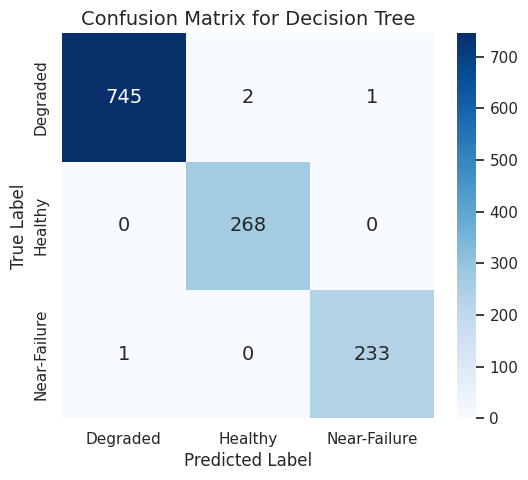


------------------------------
RESULTS FOR: Logistic Regression
------------------------------
5-fold Cross-Validation Accuracy: 0.8117

Classification Report:
              precision  recall  f1-score    support
Degraded         0.8177  0.8757    0.8457   748.0000
Healthy          0.8132  0.8284    0.8207   268.0000
Near-Failure     0.7614  0.5726    0.6537   234.0000
accuracy         0.8088  0.8088    0.8088     0.8088
macro avg        0.7974  0.7589    0.7734  1250.0000
weighted avg     0.8062  0.8088    0.8044  1250.0000


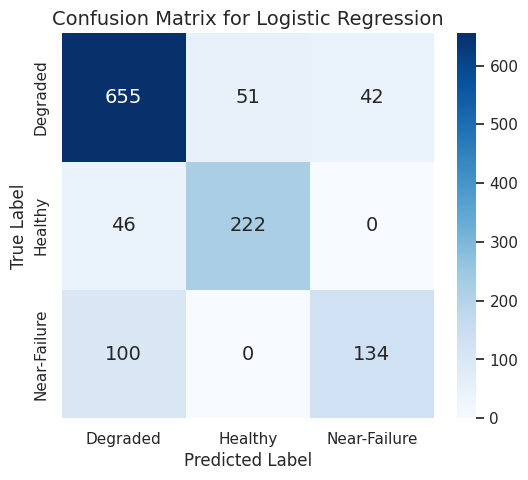


------------------------------
RESULTS FOR: Naive Bayes
------------------------------
5-fold Cross-Validation Accuracy: 0.7528

Classification Report:
              precision  recall  f1-score    support
Degraded         0.8587  0.7313    0.7899   748.0000
Healthy          0.6053  0.9328    0.7342   268.0000
Near-Failure     0.6500  0.5556    0.5991   234.0000
accuracy         0.7416  0.7416    0.7416     0.7416
macro avg        0.7047  0.7399    0.7077  1250.0000
weighted avg     0.7653  0.7416    0.7422  1250.0000


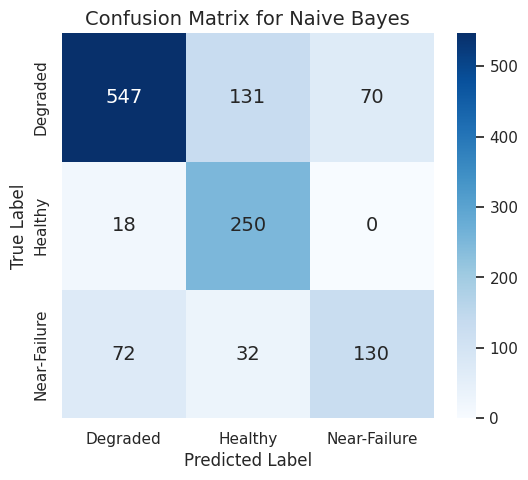


Generating simplified Decision Tree for the report...


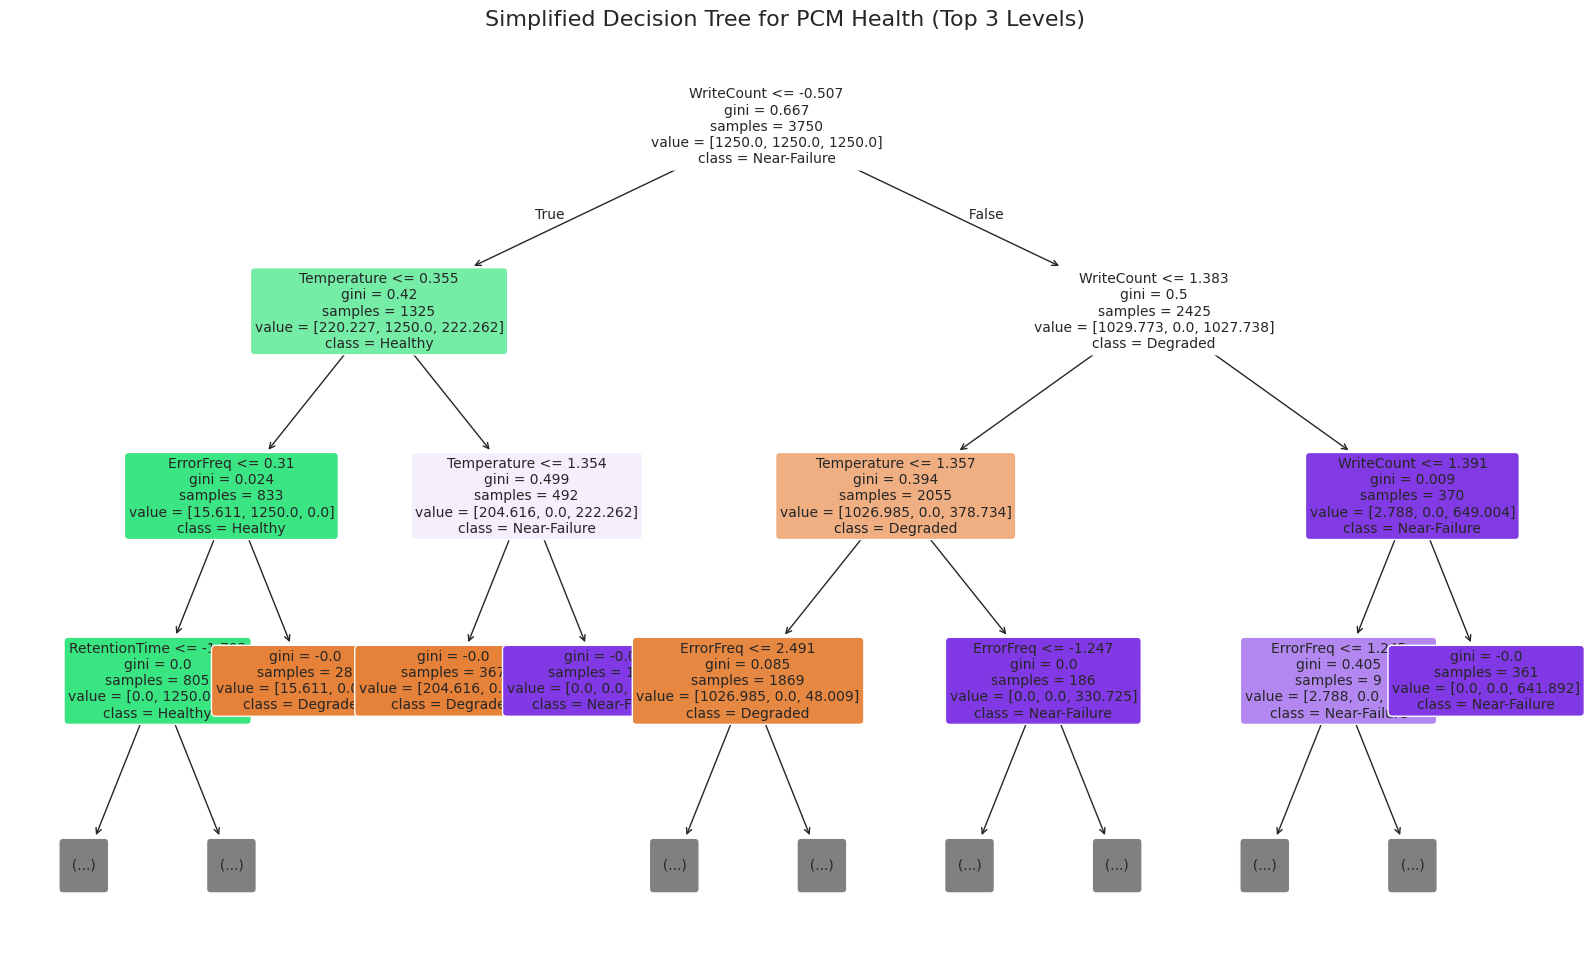


Generating Feature Importance plot...


/tmp/ipython-input-876363961.py:180: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importances, palette='viridis')


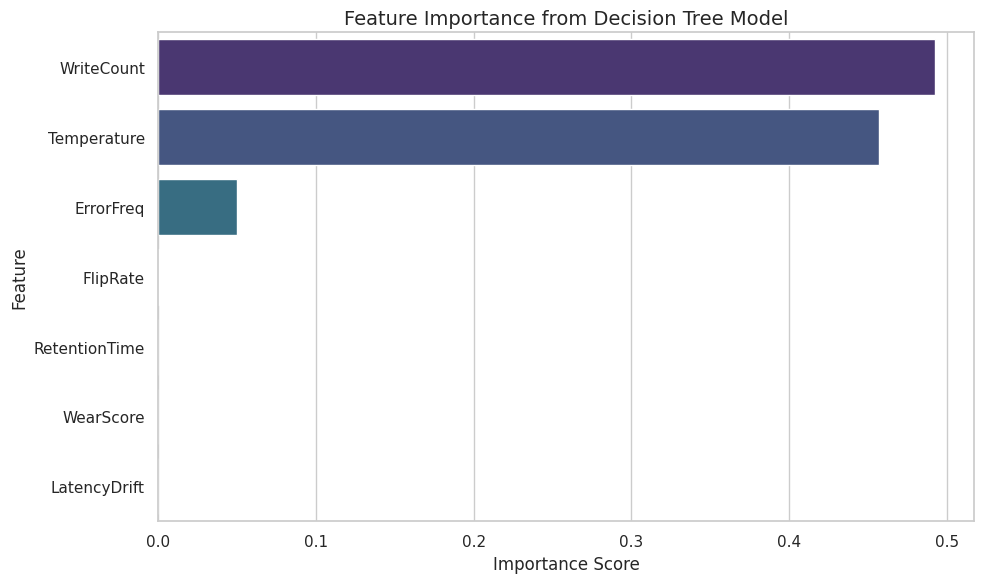



--- End of Script ---


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Set a consistent style for all plots
sns.set_theme(style="whitegrid", palette="viridis")
print("Libraries imported successfully.")

# ----------------------------
# Step 2: Advanced Data Simulation
# ----------------------------
np.random.seed(42)
N = 5000

# Simulate primary features with realistic distributions
write_count = np.random.uniform(0, 1e6, N)
temperature = np.clip(np.random.normal(60, 15, N), 25, 95)
# Error frequency drifts upwards with more writes
error_freq_lambda = 0.5 + 8.0 * (write_count / 1e6)
error_freq = np.random.poisson(lam=error_freq_lambda)

# Assemble a temporary DataFrame for labeling
df_temp = pd.DataFrame({
    "WriteCount": write_count,
    "ErrorFreq": error_freq,
    "Temperature": temperature,
})

# Advanced labeling function with multi-feature, priority-based rules
def assign_label_advanced(row):
    """Assigns a health label based on multiple feature thresholds."""
    w, e, t = row['WriteCount'], row['ErrorFreq'], row['Temperature']
    # Priority 1: Near-Failure (critical conditions)
    if t > 80 or e > 12 or w > 9e5:
        return "Near-Failure"
    # Priority 2: Degraded (warning conditions)
    if (t > 65 and t <= 80) or (e > 5 and e <= 12) or (w > 3.5e5 and w <= 9e5):
        return "Degraded"
    # Default: Healthy
    return "Healthy"

# Apply the labeling function
labels = df_temp.apply(assign_label_advanced, axis=1)

# Simulate secondary features
bit_flip_rate = np.clip(np.random.uniform(0.01, 0.15, N) * (1 + write_count / 1e6), 0.01, 0.30)
retention_time = np.random.uniform(0, 500, N)
wear_score = write_count * error_freq / 1e5
latency_drift = 100 * (1 + write_count/1e6 + np.random.normal(0, 0.02, N))

# Assemble the final DataFrame
df_final = pd.DataFrame({
    "BlockID": [f"B{i+1}" for i in range(N)],
    "WriteCount": write_count.astype(int),
    "ErrorFreq": error_freq,
    "Temperature": np.round(temperature, 2),
    "FlipRate": np.round(bit_flip_rate, 3),
    "RetentionTime": np.round(retention_time, 1),
    "WearScore": np.round(wear_score, 4),
    "LatencyDrift": np.round(latency_drift, 2),
    "Label": labels
})

print("\n✅ Step 2: Data simulation complete.")
print("\nClass balance:\n", df_final['Label'].value_counts(normalize=True).round(2), "\n")
df_final.to_csv("pcm_health_final_dataset.csv", index=False)
print("Dataset saved to 'pcm_health_final_dataset.csv'")

# ----------------------------
# Step 3: Feature Engineering & Exploratory Data Analysis (EDA)
# ----------------------------
# Encode labels to numbers (0, 1, 2)
le = LabelEncoder()
df_final['LabelEnc'] = le.fit_transform(df_final['Label'])

# Identify features for scaling
continuous_features = ["WriteCount", "ErrorFreq", "Temperature", "FlipRate", "RetentionTime", "WearScore", "LatencyDrift"]

# --- EDA Visualization ---
print("\n✅ Step 3: Starting Exploratory Data Analysis...")
for feat in continuous_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df_final, x=feat, hue="Label", kde=True, palette="viridis")
    plt.title(f"Distribution of {feat} by Health Status", fontsize=14)
    plt.xlabel(feat, fontsize=12)
    plt.ylabel("Number of Blocks", fontsize=12)
    plt.tight_layout()
    plt.show()

# Scale features for models that require it
scaler = StandardScaler()
df_scaled = df_final.copy()
df_scaled[continuous_features] = scaler.fit_transform(df_final[continuous_features])
print("Feature scaling complete.")

# ----------------------------
# Step 4: Model Training & Evaluation
# ----------------------------
print("\n✅ Step 4: Training and evaluating models...")
# Prepare data for scikit-learn
X_scaled = df_scaled[continuous_features]
y = df_scaled['Label']

# Stratified train-test split to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)

# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=5, class_weight="balanced", random_state=42),
    "Logistic Regression": LogisticRegression(multi_class="multinomial", max_iter=1000, random_state=42),
    "Naive Bayes": GaussianNB()
}

# Train, evaluate, and store results
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cv_acc = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy"))
    results[name] = {
        "model_instance": model,
        "cv_accuracy": cv_acc,
        "report": classification_report(y_test, y_pred, output_dict=True),
        "cm": confusion_matrix(y_test, y_pred, labels=le.classes_)
    }

# ----------------------------
# Step 5: Final Results and Visualization
# ----------------------------
print("\n✅ Step 5: Displaying final results and visualizations...")
for name, res in results.items():
    print(f"\n{'---'*10}\nRESULTS FOR: {name}\n{'---'*10}")
    print(f"5-fold Cross-Validation Accuracy: {res['cv_accuracy']:.4f}")
    report_df = pd.DataFrame(res['report']).transpose()
    print("\nClassification Report:")
    print(report_df.round(4))

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(res['cm'], annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_, annot_kws={"size": 14})
    plt.xlabel("Predicted Label", fontsize=12)
    plt.ylabel("True Label", fontsize=12)
    plt.title(f'Confusion Matrix for {name}', fontsize=14)
    plt.show()

# --- Specialized Visualizations for the Report ---

# 1. Simplified Decision Tree Plot (for interpretability)
print("\nGenerating simplified Decision Tree for the report...")
dt_model = results["Decision Tree"]["model_instance"]
plt.figure(figsize=(20, 12))
plot_tree(dt_model,
          feature_names=continuous_features,
          class_names=le.classes_,
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=3) # Limit depth for clarity
plt.title("Simplified Decision Tree for PCM Health (Top 3 Levels)", fontsize=16)
plt.show()

# 2. Feature Importance Plot
print("\nGenerating Feature Importance plot...")
importances = pd.DataFrame({
    'feature': continuous_features,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importances, palette='viridis')
plt.title('Feature Importance from Decision Tree Model', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

print("\n\n--- End of Script ---")


✅ Synthetic data created.
Class balance:
 Label
Degraded        2990
Healthy         1073
Near-Failure     937
Name: count, dtype: int64

------------------------------
Decision Tree
5-fold CV Accuracy: 0.9989
              precision  recall  f1-score    support
0                0.9987  0.9960    0.9973   748.0000
1                0.9926  1.0000    0.9963   268.0000
2                0.9957  0.9957    0.9957   234.0000
accuracy         0.9968  0.9968    0.9968     0.9968
macro avg        0.9957  0.9972    0.9964  1250.0000
weighted avg     0.9968  0.9968    0.9968  1250.0000


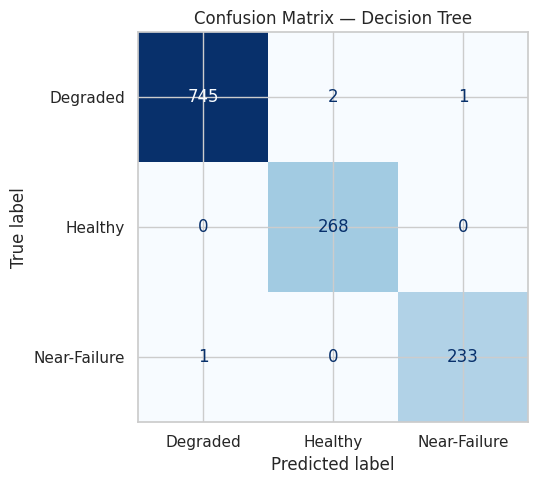

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi


------------------------------
Logistic Regression
5-fold CV Accuracy: 0.8117
              precision  recall  f1-score    support
0                0.8177  0.8757    0.8457   748.0000
1                0.8132  0.8284    0.8207   268.0000
2                0.7614  0.5726    0.6537   234.0000
accuracy         0.8088  0.8088    0.8088     0.8088
macro avg        0.7974  0.7589    0.7734  1250.0000
weighted avg     0.8062  0.8088    0.8044  1250.0000


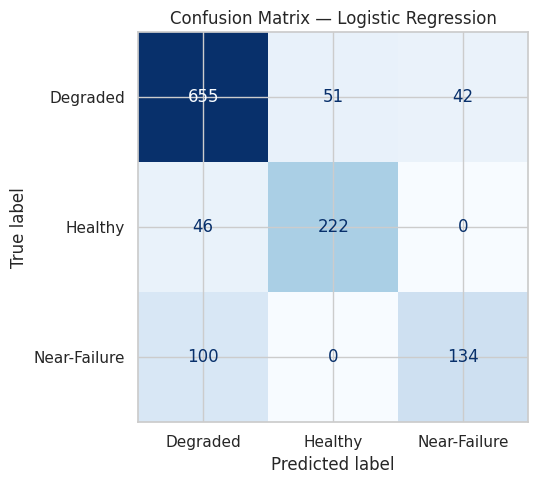


------------------------------
Naive Bayes
5-fold CV Accuracy: 0.7528
              precision  recall  f1-score    support
0                0.8587  0.7313    0.7899   748.0000
1                0.6053  0.9328    0.7342   268.0000
2                0.6500  0.5556    0.5991   234.0000
accuracy         0.7416  0.7416    0.7416     0.7416
macro avg        0.7047  0.7399    0.7077  1250.0000
weighted avg     0.7653  0.7416    0.7422  1250.0000


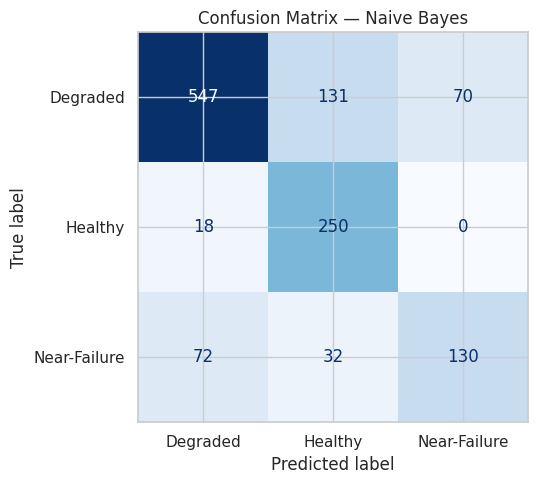


------------------------------
Random Forest
5-fold CV Accuracy: 0.9984
              precision  recall  f1-score    support
0                1.0000  0.9973    0.9987   748.0000
1                0.9926  1.0000    0.9963   268.0000
2                1.0000  1.0000    1.0000   234.0000
accuracy         0.9984  0.9984    0.9984     0.9984
macro avg        0.9975  0.9991    0.9983  1250.0000
weighted avg     0.9984  0.9984    0.9984  1250.0000


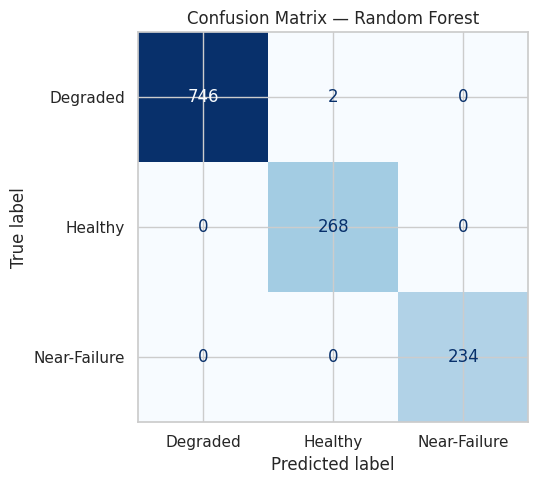

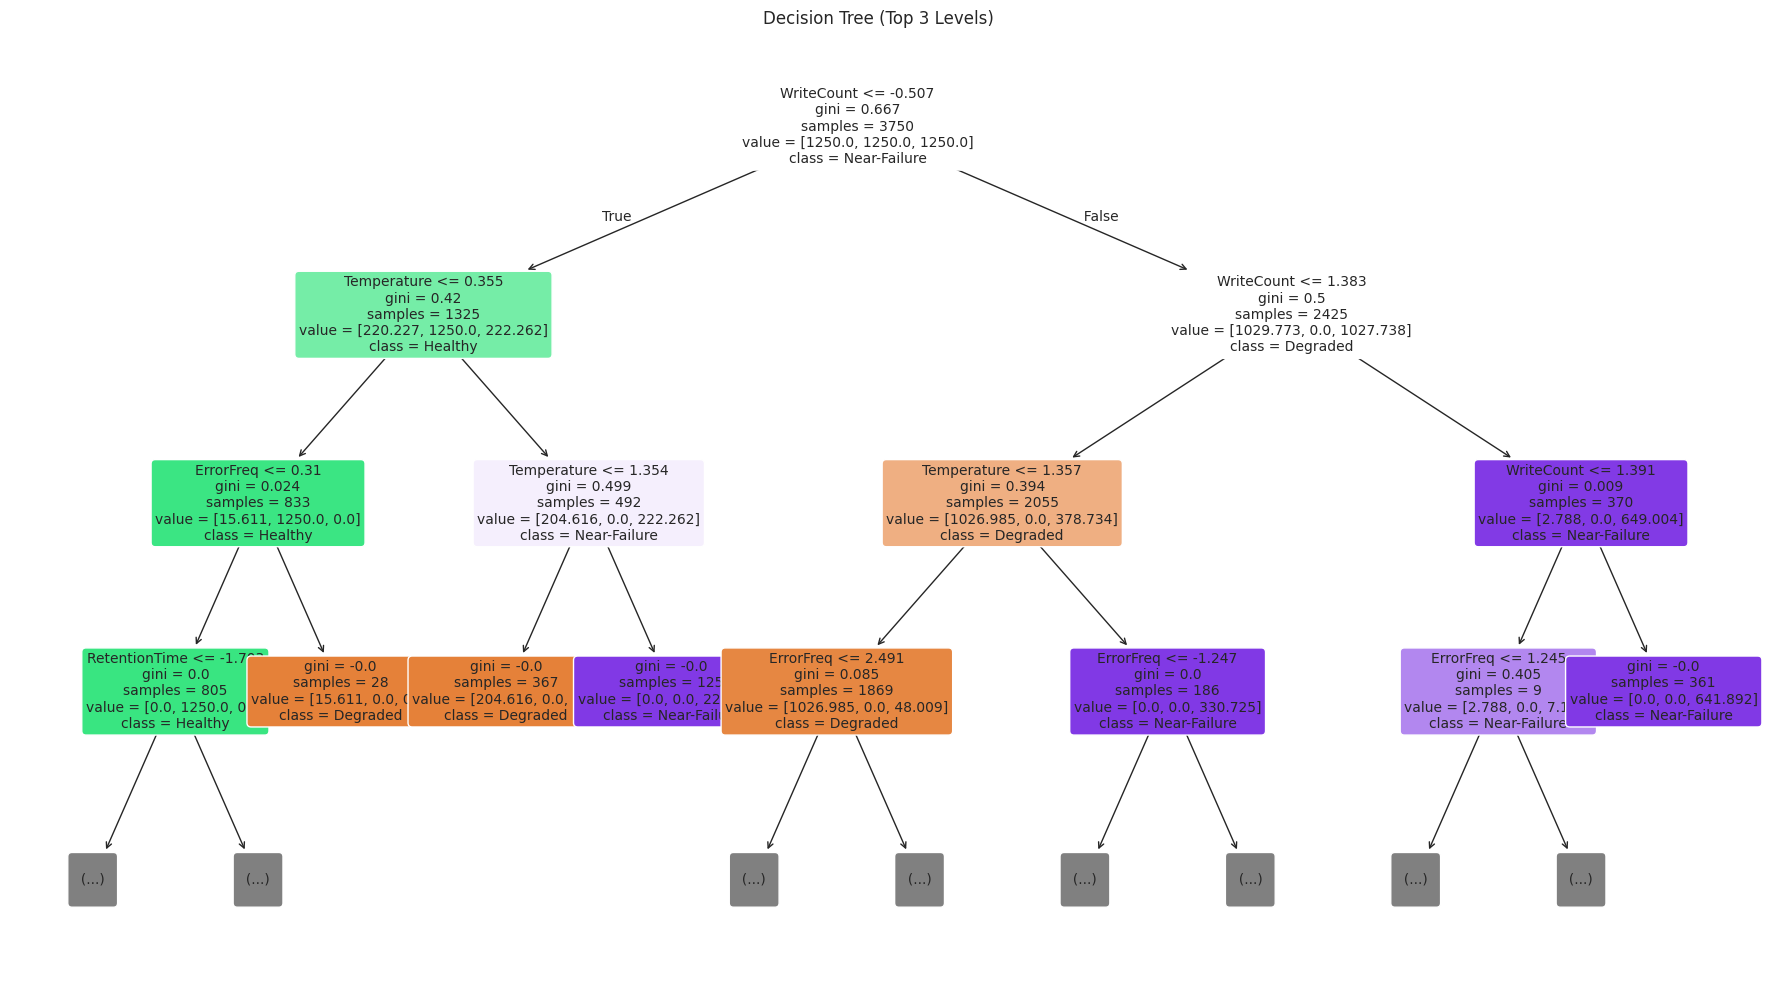


Feature importances (DT vs RF)
               Decision Tree  Random Forest
Temperature            0.457          0.388
WriteCount             0.492          0.262
LatencyDrift           0.000          0.175
WearScore              0.000          0.106
ErrorFreq              0.050          0.048
FlipRate               0.000          0.013
RetentionTime          0.000          0.008


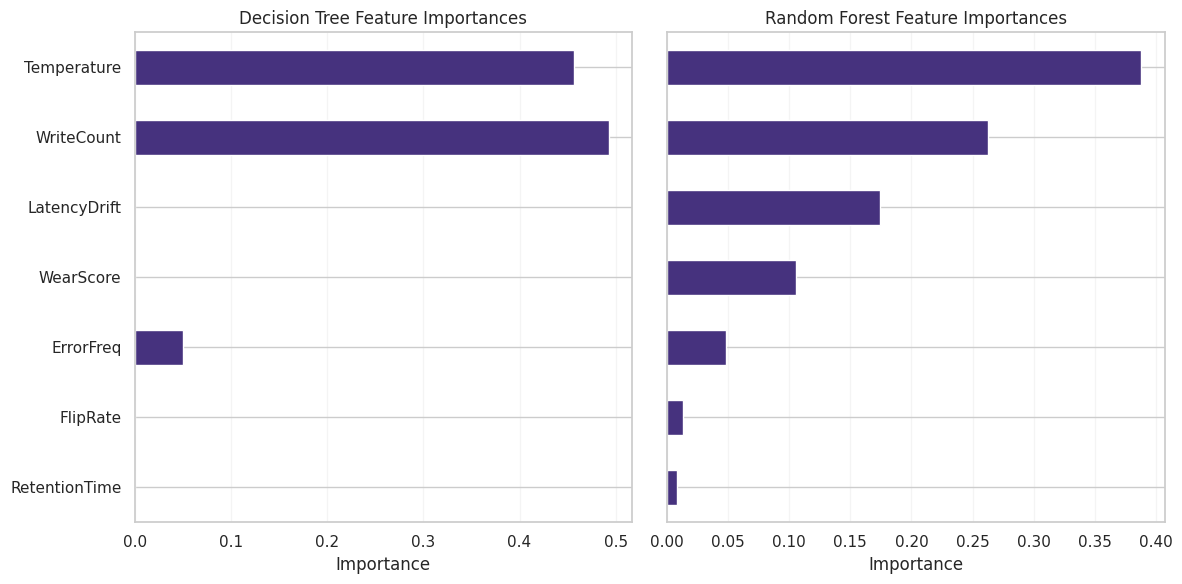

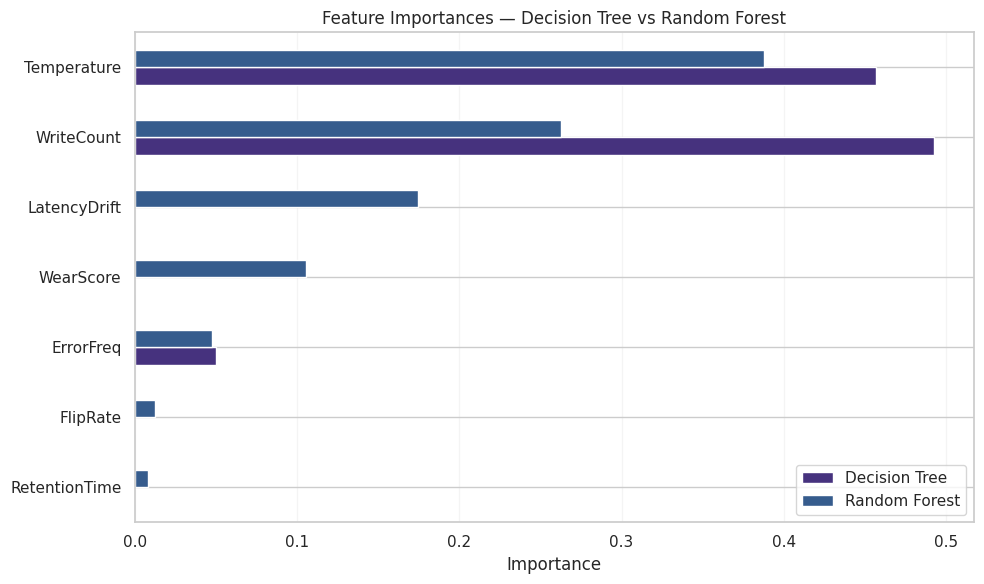


--- End of run ---


In [2]:
# =========================================================
# Interpretable ML for PCM Health — Synthetic Dataset (1-cell script)
# Models: Decision Tree, Logistic Regression, Gaussian NB, Random Forest
# =========================================================

# -- Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# -- Plot style
sns.set_theme(style="whitegrid", palette="viridis")
np.random.seed(42)

# =========================================================
# 1) Synthetic data generation (5,000 blocks)
# =========================================================
N = 5000

# Primary features
write_count   = np.random.uniform(0, 1e6, N)                        # 0 .. 1,000,000
temperature   = np.clip(np.random.normal(60, 15, N), 25, 95)        # ~N(60,15) clipped
err_lambda    = 0.5 + 8.0 * (write_count / 1e6)                     # more writes -> more errors
error_freq    = np.random.poisson(lam=err_lambda)

# Base frame for labeling
df_tmp = pd.DataFrame({
    "WriteCount": write_count,
    "ErrorFreq":  error_freq,
    "Temperature":temperature
})

# Priority labeling logic (Near-Failure > Degraded > Healthy)
def assign_label(row):
    w, e, t = row["WriteCount"], row["ErrorFreq"], row["Temperature"]
    if t > 80 or e > 12 or w > 9e5:
        return "Near-Failure"
    if (65 < t <= 80) or (5 < e <= 12) or (3.5e5 < w <= 9e5):
        return "Degraded"
    return "Healthy"

labels = df_tmp.apply(assign_label, axis=1)

# Secondary features (for richness)
flip_rate      = np.clip(np.random.uniform(0.01, 0.15, N)*(1+write_count/1e6), 0.01, 0.30)
retention_time = np.random.uniform(0, 500, N)
wear_score     = write_count*error_freq/1e5
latency_drift  = 100*(1 + write_count/1e6 + np.random.normal(0, 0.02, N))

# Final dataset
df = pd.DataFrame({
    "BlockID":       [f"B{i+1}" for i in range(N)],
    "WriteCount":    write_count.astype(int),
    "ErrorFreq":     error_freq,
    "Temperature":   np.round(temperature, 2),
    "FlipRate":      np.round(flip_rate, 3),
    "RetentionTime": np.round(retention_time, 1),
    "WearScore":     np.round(wear_score, 4),
    "LatencyDrift":  np.round(latency_drift, 2),
    "Label":         labels
})

print("✅ Synthetic data created.")
print("Class balance:\n", df["Label"].value_counts())

# =========================================================
# 2) Encode, scale, train/test split
# =========================================================
features = ["WriteCount","ErrorFreq","Temperature",
            "FlipRate","RetentionTime","WearScore","LatencyDrift"]

# label encoding (preserve human-readable classes for confusion matrix)
le = LabelEncoder()
df["LabelEnc"] = le.fit_transform(df["Label"])
class_order = list(le.classes_)   # ['Degraded','Healthy','Near-Failure'] (order may vary)

# scale continuous features for LR/NB
scaler = StandardScaler()
X = df[features].copy()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=features)
y = df["LabelEnc"].copy()

X_tr, X_te, y_tr, y_te = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)

# =========================================================
# 3) Model zoo (DT, LR, GNB, RF)
# =========================================================
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=5, class_weight="balanced",
                                            random_state=42),
    "Logistic Regression": LogisticRegression(multi_class="multinomial", max_iter=1000,
                                              random_state=42),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(
        n_estimators=300, max_depth=None, min_samples_leaf=2,
        class_weight="balanced_subsample", random_state=42, n_jobs=-1
    )
}

results = {}

for name, model in models.items():
    # Fit + CV
    model.fit(X_tr, y_tr)
    cv_acc = cross_val_score(model, X_tr, y_tr, cv=5, scoring="accuracy").mean()

    # Test set predictions
    y_pred = model.predict(X_te)
    rep = classification_report(y_te, y_pred, output_dict=True, zero_division=0)
    cm = confusion_matrix(y_te, y_pred, labels=le.transform(class_order))

    results[name] = {
        "model": model,
        "cv_acc": cv_acc,
        "report": rep,
        "cm": cm
    }

    # Print metrics
    print("\n" + "-"*30)
    print(name)
    print(f"5-fold CV Accuracy: {cv_acc:.4f}")
    rep_df = pd.DataFrame(rep).T
    print(rep_df.round(4))

    # Confusion matrix plot
    fig, ax = plt.subplots(figsize=(6,5))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_order)
    disp.plot(cmap="Blues", values_format="d", colorbar=False, ax=ax)
    ax.set_title(f"Confusion Matrix — {name}")
    plt.tight_layout()
    plt.show()

# =========================================================
# 4) Small Decision Tree viz (top 3 levels)
# =========================================================
plt.figure(figsize=(18, 10))
plot_tree(results["Decision Tree"]["model"],
          feature_names=features,
          class_names=class_order,
          filled=True, rounded=True, fontsize=10, max_depth=3)
plt.title("Decision Tree (Top 3 Levels)")
plt.tight_layout()
plt.show()

# =========================================================
# 5) Feature importances — DT vs RF (side-by-side + combined)
# =========================================================
dt_model = results["Decision Tree"]["model"]
rf_model = results["Random Forest"]["model"]

dt_imp = pd.Series(dt_model.feature_importances_, index=features, name="Decision Tree")
rf_imp = pd.Series(rf_model.feature_importances_, index=features, name="Random Forest")

# One table to compare
compare_imp = pd.concat([dt_imp, rf_imp], axis=1)
print("\n============================")
print("Feature importances (DT vs RF)")
print("============================")
print(compare_imp.sort_values("Random Forest", ascending=False).round(3))

# Side-by-side plots (same feature order by RF)
order = rf_imp.sort_values(ascending=True).index

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
compare_imp.loc[order, "Decision Tree"].plot.barh(ax=axes[0])
axes[0].set_title("Decision Tree Feature Importances")
axes[0].set_xlabel("Importance"); axes[0].grid(axis="x", alpha=0.2)

compare_imp.loc[order, "Random Forest"].plot.barh(ax=axes[1])
axes[1].set_title("Random Forest Feature Importances")
axes[1].set_xlabel("Importance"); axes[1].grid(axis="x", alpha=0.2)

plt.tight_layout()
plt.show()

# (Optional) single grouped chart
ax = compare_imp.loc[order].plot.barh(figsize=(10,6))
ax.set_title("Feature Importances — Decision Tree vs Random Forest")
ax.set_xlabel("Importance"); ax.grid(axis="x", alpha=0.2)
plt.tight_layout()
plt.show()

print("\n--- End of run ---")